# Amazon reviews report

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


In [72]:
# Step 1: Set the path to the folder containing your files
folder_path = '../factored-datathon-2023-data-science-rockstars/final_ahora_si_talvez/Agrupado'

# Step 2: List all the files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dfs = []

# Step 3: Read each file into a DataFrame and store in the list
for file_name in file_list:
    # Replace '.csv' with the appropriate file extension
    if file_name.endswith('.gzip'):
        file_path = os.path.join(folder_path, file_name)
        # Use the appropriate read function for your file type
        df = pd.read_parquet(file_path, engine='fastparquet')
        dfs.append(df)

# Step 4: Concatenate the DataFrames into a single one
concatenated_df = pd.concat(dfs, ignore_index=True)
concatenated_df = concatenated_df.query('overall != 0')
# Now, 'concatenated_df' contains all the data from the files in a single DataFrame.


In [73]:
# Step 1: Set the path to the folder containing your files
folder_path = '../factored-datathon-2023-data-science-rockstars/final_ahora_si_talvez/Games'

# Step 2: List all the files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dfs = []

# Step 3: Read each file into a DataFrame and store in the list
for file_name in file_list:
    # Replace '.csv' with the appropriate file extension
    if file_name.endswith('.gzip'):
        file_path = os.path.join(folder_path, file_name)
        # Use the appropriate read function for your file type
        df = pd.read_parquet(file_path, engine='fastparquet')
        dfs.append(df)

# Step 4: Concatenate the DataFrames into a single one
df_games = pd.concat(dfs, ignore_index=True)
df_games = df_games.query('overall != 0')
# Now, 'concatenated_df' contains all the data from the files in a single DataFrame.


In [74]:
concatenated_df['Year'] = concatenated_df['YearMonth'].astype(
    str).str[:4].astype('int16')
concatenated_df['Month'] = concatenated_df['YearMonth'].astype(
    str).str[4:].astype('int16')


In [75]:
df_trend = concatenated_df.groupby(['Year', 'Month', 'overall']).agg({'total_count': 'sum', 'distinct_count': 'sum', 'votes_sum': 'sum'}).sort_values(
    by=['Year', 'Month', 'overall'], ascending=[True, True, False]).reset_index()
df_trend['Year-Month'] = concatenated_df['Year'].astype(
    str) + '-' + concatenated_df['Month'].astype(str)
df_trend['frequent_reviewers_percentage'] = (
    1 - np.divide(df_trend['distinct_count'], df_trend['total_count']))*100
df_trend['overall'] = df_trend['overall'].astype(str)


In [76]:
df_trend = df_trend.query('Year <= 2018 and Month <= 5')


### Report

### 1. Introduction
In this report we examine data related to Amazon product reviews. In the first part, we focus on giving an overview of the behaviour of reviews as rated by users. In the second part, we perform a sentiment analysis on some reviews.

### 2. Overview

During the data exploration phase we noticed that many more users gave a rating of 5 than chose one of the other four ratings. Therefore, this general analysis focuses on examining the behaviour of each rating.

In this first graph,"Number of reviewers by overall rating",we show the behaviour of each rating over time according to the number of users who gave that rating, for each month. The number of users is the number of unique user identifications that have given this rating to a product.
In the graph, we can see that the rating of 5 is the predominant one, it increased exponentially since the second quarter of 2012 and maintained the growth until the second quarter of 2016. We can see that the second most important rating is the 4, which has maintained a more stable behaviour compared to the 5, but is still far behind the first one. The remaining ratings have a similar number of users over time.

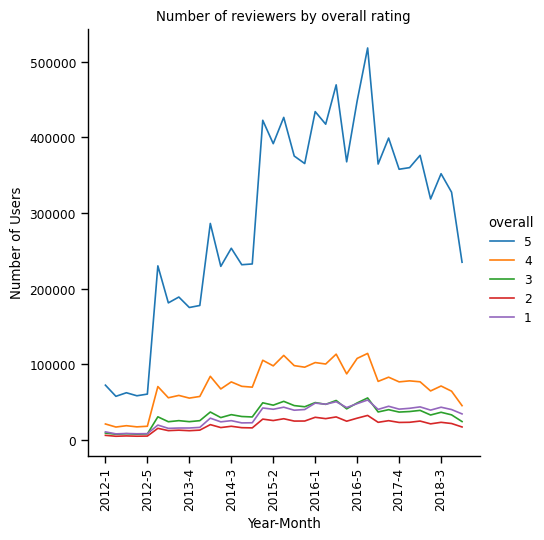

In [77]:

sns.set_context('paper')
sns.relplot(data=df_trend, x='Year-Month',
            y='distinct_count', hue='overall', kind='line')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title('Number of reviewers by overall rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)

plt.show()


Seeing the difference in the graph above made us think that there might be users who frequently give 5 stars to multiple products, thus inflating the statistic. Therefore, for each type of rating, we looked at the percentage of users who have rated two or more times, this calculation is the comparison between the total number of ratings or user identifications and the number of unique user identifications that have rated a product.
The result of this analysis can be seen in the graph **"Percentage of frequent reviewers by total rating"**, where we can see that high ratings, 5 and 4, tend to have more frequent reviewers. We can also see that the 5 rating comes out on top again, with an average difference of 3% more frequent reviewers than the 4 rating. 
* For the overall rating of 5, we have 6% to 7% of frequent reviewers
* For the overall rating of 5, we have 4% to 4.5% of frequent reviewers

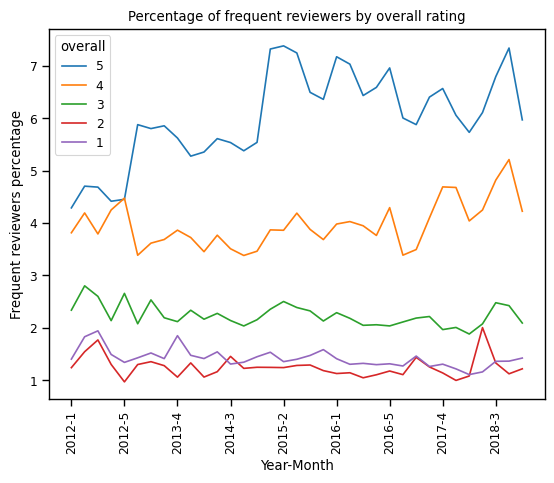

In [78]:

sns.lineplot(data=df_trend, x='Year-Month',
             y='frequent_reviewers_percentage', hue='overall')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title('Percentage of frequent reviewers by overall rating')
plt.ylabel('Frequent reviewers percentage')
plt.show()


In addition to users by rating, we analysed the number of interactions or votes each review had according to its rating, as we noticed during the data exploration phase and confirmed in this report that people interact more with the 5-point reviews than the rest. 

As we can see in the "Votes by overall rating" graph, the 5 point reviews have a much higher average than the other ratings. We can also see that reviews with a score of 1 receive more interactions than those with a score of 5. 
From this graph, we can see that the distribution of interactions is skewed towards the extremes of 5 and 1, and that the growth seen from 2 point reviews to 4 is interrupted by the abrupt increase in interactions of the overall rating of 5.

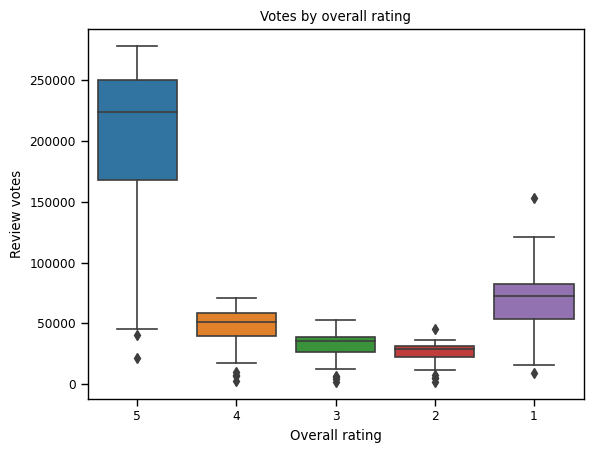

In [79]:

sns.boxplot(data=df_trend, x="overall", y="votes_sum")
plt.title('Votes by overall rating')
plt.xlabel('Overall rating')
plt.ylabel('Review votes')
plt.show()


In the same way as the previous graph, we explored the possible relationship between the number of users who are frequent reviewers and the number of votes a review receives. In the following, we present the correlation graph "Frequent reviewers and number of interactions" according to the overall rating. 

We see that there is no clear correlation between these two variables. However, we confirm the phenomenon that reviews with an overall rating of 5 show a completely different behaviour to the other ratings.


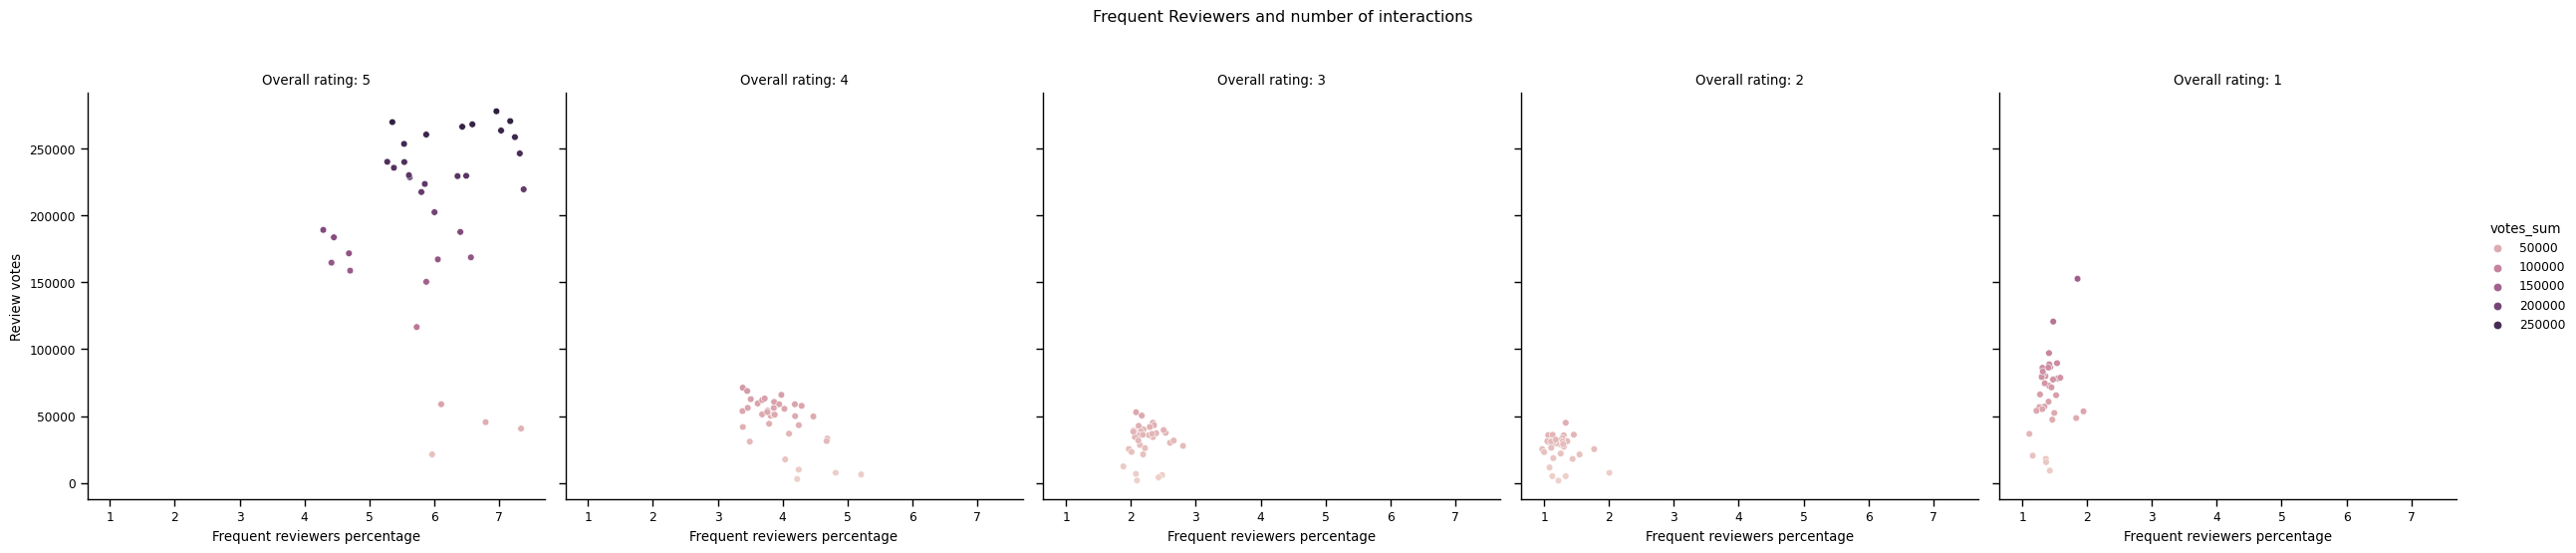

In [80]:

rel = sns.relplot(data=df_trend, x='frequent_reviewers_percentage',
                  y='votes_sum', kind='scatter', col='overall', hue='votes_sum')
rel.fig.suptitle('Frequent Reviewers and number of interactions', y=1.1)
rel.set(xlabel='Frequent reviewers percentage', ylabel='Review votes')
rel.set_titles("Overall rating: {col_name}")
plt.show()


Finally, we show the correlation matrix between the number of users who frequently review and the number of votes or interactions the review has received.
We have a correlation index of 0.7, which leads us to believe that there is a strong correlation between these two variables. However, from what we saw earlier, we know that this may be skewed by the 5 star reviews.


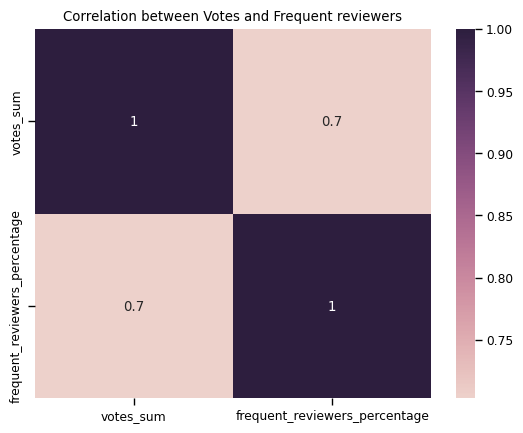

In [81]:

sns.heatmap(df_trend[['votes_sum', 'frequent_reviewers_percentage']].corr(
), label=True, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation between Votes and Frequent reviewers')
plt.show()


##### Main takeaways:
* We found that in the sample data we have, most reviews have an overall rating of 5 points.

* 5 point reviews tend to have more repeated reviewers than the others.

* Users interact more with the 5 point reviews, but they also interact with the 1 point reviews. It seems that users tend to be more supportive of reviews that are very positive or very negative. Considering that the number of 5-star reviews is much higher, this does not seem worrying.

* Reviews with an overall rating of 5 show an anomalous behaviour compared to the others. There may be several reasons for this. 
1. The first is that the data sample may be unbalanced and that in reality the reviews are more evenly distributed across the different ratings. 
2. The second is that the phenomenon we see in the report corresponds to reality, and that users tend to be more supportive of positive reviews and more likely to share positive comments about the products they see. 
3.  The third is that the reviews are skewed by bot activity or paid reviews.

In [84]:
% % capture
!jupyter nbconvert - -to html - -no-input - -no-prompt Presentation_Datathon_2.ipynb
